In [2]:
'''
Kalman Filter Predictions

Rahul Manusmare
Mohit Balani
Kaushal Modi
Akhilesh Ravi

'''

import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt
import nbinteract as nbi

In [3]:
# Instantiate OCV kalman filter
class KalmanFilter:

    kf = cv.KalmanFilter(4, 2)
    kf.measurementMatrix = np.array([[1, 0, 0, 0], [0, 1, 0, 0]], np.float32)
    kf.transitionMatrix = np.array([[1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32)

    def Estimate(self, coordX, coordY):
        ''' This function estimates the position of the object'''
        measured = np.array([[np.float32(coordX)], [np.float32(coordY)]])
        self.kf.correct(measured)
        predicted = self.kf.predict()
        return predicted

def normal(mean, sd):
    '''Returns 1000 points drawn at random fron N(mean, sd)'''
    return np.random.normal(mean, sd, 1000)


# Instantiate OCV kalman filter
class KalmanFilter:

    kf = cv.KalmanFilter(4, 2)
    kf.measurementMatrix = np.array([[1, 0, 0, 0], [0, 1, 0, 0]], np.float32)
    kf.transitionMatrix = np.array([[1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32)

    def Estimate(self, coordX, coordY):
        ''' This function estimates the position of the object'''
        measured = np.array([[np.float32(coordX)], [np.float32(coordY)]])
        self.kf.correct(measured)
        predicted = self.kf.predict()
        return predicted

#Performs required image processing to get ball coordinated in the video

def Predict(x, flag=0):
    if flag == 1:
        global traj_x,traj_y, pred_x, pred_y
        y = math.sin(x)
        
        traj_x.append(x)
        traj_y.append(y)
        
        # Kalman Filter Object
        global kfObj

        predictedCoords = kfObj.Estimate(x, y)
        
        pred_x.append(predictedCoords[0])
        pred_y.append(predictedCoords[1])

        
        plt.plot(traj_x[1:], traj_y[1:],'r',label='Actual')
        plt.plot(pred_x[:-1], pred_y[:-1],'y',label='Predicted')
        
        plt.show()

        return []
    else:
        plt.plot(traj_x[1:], traj_y[1:],'r',label='Actual')
        plt.plot(pred_x[:-1], pred_y[:-1],'y',label='Predicted')

        plt.show()
        return []

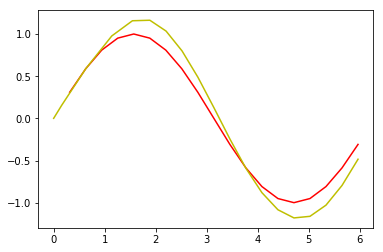

In [4]:
#Create Kalman Filter Object
kfObj = KalmanFilter()
predictedCoords = np.zeros((2, 1), np.float32)

pos = []
i = 0

traj_x = [i*2*math.pi/20 for i in range(20)]
traj_y = [math.sin(val) for val in traj_x]

pred_x = []
pred_y = []

while(i < 20):
    ballX, ballY = traj_x[i], traj_y[i]

    predictedCoords = kfObj.Estimate(ballX, ballY)
    pred_x.append(predictedCoords[0])
    pred_y.append(predictedCoords[1])
    i += 1

plt.plot(traj_x[1:], traj_y[1:],'r',label='Actual')
plt.plot(pred_x[:-1], pred_y[:-1],'y',label='Predicted')
plt.show()

nbi.hist(Predict, x=(2*math.pi, 6*math.pi), flag=(0,1))